## Домашняя работа к уроку 1:
⭐ Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [8]:
data_path = 'pic1.jpg'
img =  imageio.imread(data_path)

In [9]:
img = img.astype(np.float32) / 255.
print(img.shape)

(768, 1024, 3)


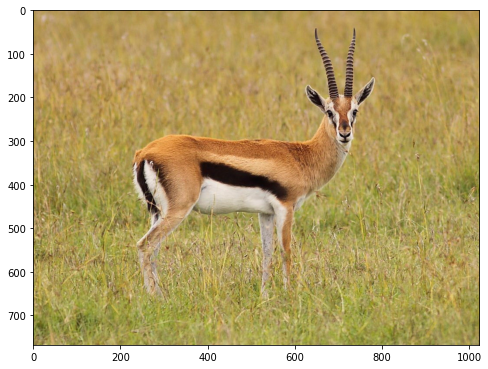

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Изменение яркости

- уменшение

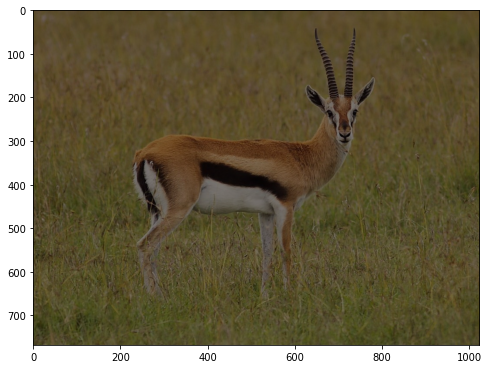

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

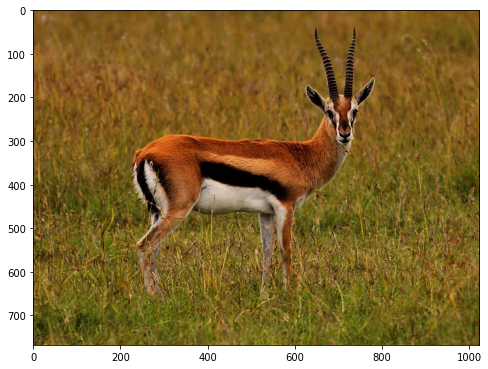

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2)

- увеличение

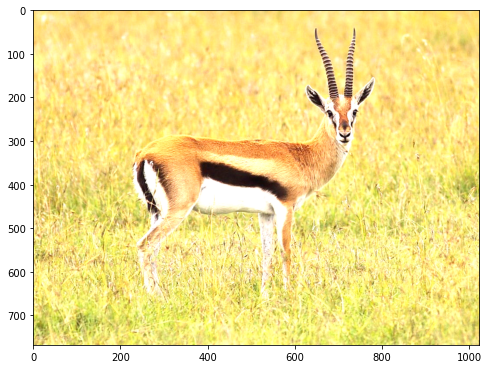

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img*1.5)

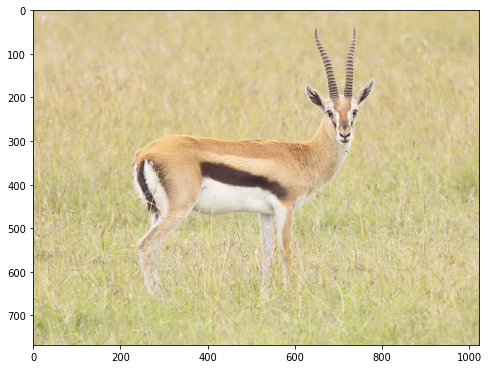

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5)

## Черно-белое изображение

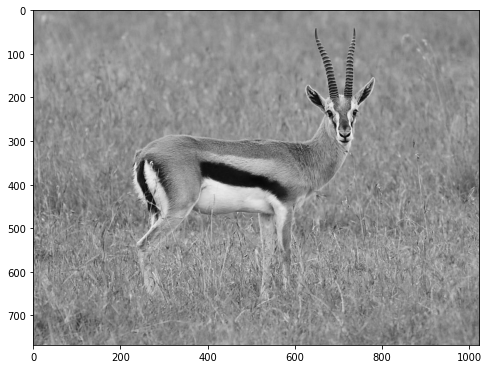

In [15]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Перевод в другое цветовое пространство

In [16]:
from skimage.color import rgb2hsv, hsv2rgb

In [17]:
img_hsv = rgb2hsv(img)

In [18]:
img_hsv[:5, :5, :]

array([[[0.11648747, 0.54385966, 0.67058825],
        [0.11648747, 0.53757226, 0.6784314 ],
        [0.11538462, 0.5260116 , 0.6784314 ],
        [0.11235955, 0.51744187, 0.6745098 ],
        [0.10658915, 0.49710983, 0.6784314 ]],

       [[0.11879433, 0.55294114, 0.6666667 ],
        [0.11648747, 0.5406977 , 0.6745098 ],
        [0.11538462, 0.5260116 , 0.6784314 ],
        [0.11235955, 0.51445085, 0.6784314 ],
        [0.10658915, 0.49425286, 0.68235296]],

       [[0.11879433, 0.556213  , 0.6627451 ],
        [0.11648747, 0.5406977 , 0.6745098 ],
        [0.11538462, 0.5260116 , 0.6784314 ],
        [0.11235955, 0.5114943 , 0.68235296],
        [0.10795455, 0.5       , 0.6901961 ]],

       [[0.11879433, 0.556213  , 0.6627451 ],
        [0.11879433, 0.5497076 , 0.67058825],
        [0.11648747, 0.5344828 , 0.68235296],
        [0.11538462, 0.52      , 0.6862745 ],
        [0.10795455, 0.49717513, 0.69411767]],

       [[0.11979166, 0.56804734, 0.6627451 ],
        [0.11879433, 0.549

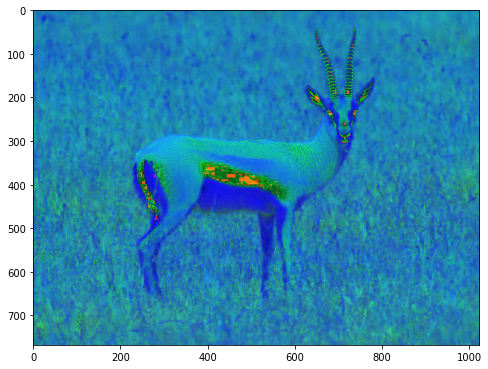

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

## Уменьшение насыщенности

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 3
img_new = hsv2rgb(img_hsv_new)

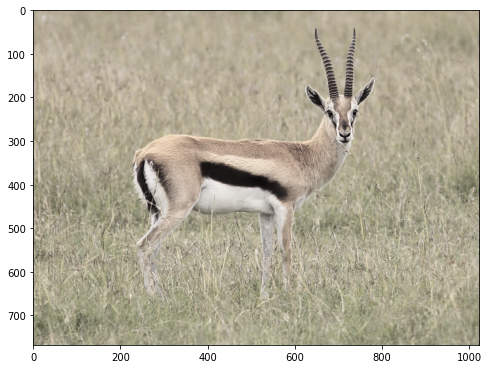

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Свертки

- Гауссовское распределение

In [22]:
def conv(img, w):
    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
         img.shape[1] - w.shape[1] + 1,
         img.shape[2]), 
         dtype=np.float32)
    
    for c in range(out_img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i+w.shape[0], j:j+w.shape[1], c]
        
                out_img[i,j,c] = np.sum(w * x)
    
    return out_img

In [23]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

new_img = conv(img, w)

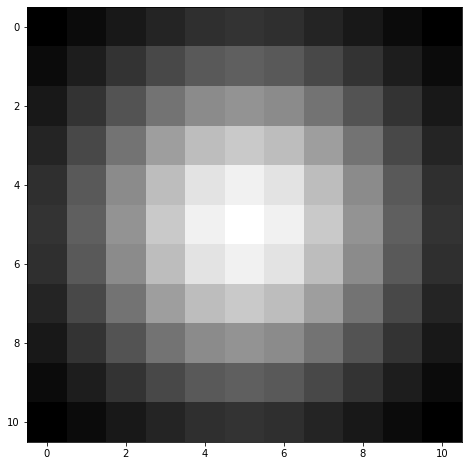

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(w, cmap='gray')
plt.show()

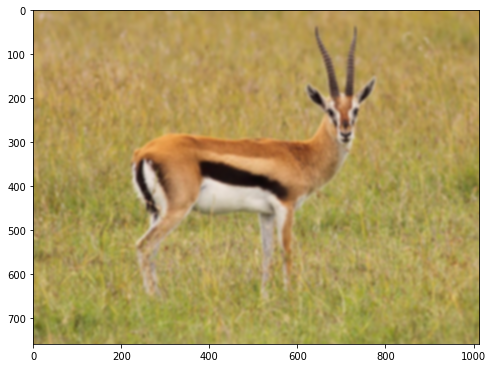

In [25]:
plt.figure(figsize=(8, 8))
plt.imshow(new_img)
plt.show()

- библиотека scipy.signal

In [26]:
import scipy.signal

In [27]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 1.03 s, sys: 820 µs, total: 1.03 s
Wall time: 1.03 s


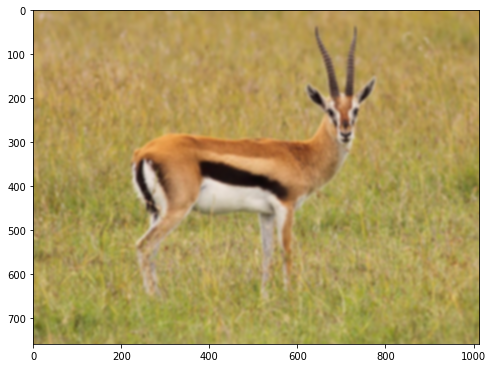

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)